In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


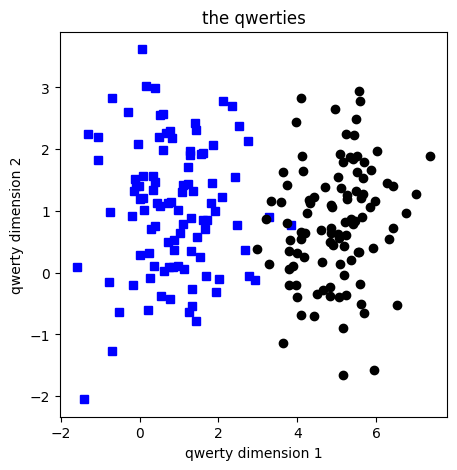

In [2]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [4]:
def createANNModel(learningRate):
    model = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1)
        #
    )

    lossfunc = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.SGD(model.parameters(), learningRate)

    return model, lossfunc, optimizer

In [16]:
numEpochs = 1000
learningRate = 0.01

def trainTheModel(ANNModel):
    losses = torch.zeros(numEpochs)

    for epochi in range(numEpochs):
        yHat = ANNModel(data)

        loss = lossfunc(yHat, labels)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNModel(data)

    totalacc = torch.mean(((predictions>0) == labels).float())

    return losses, predictions, totalacc


Final accuracy: 0.93%


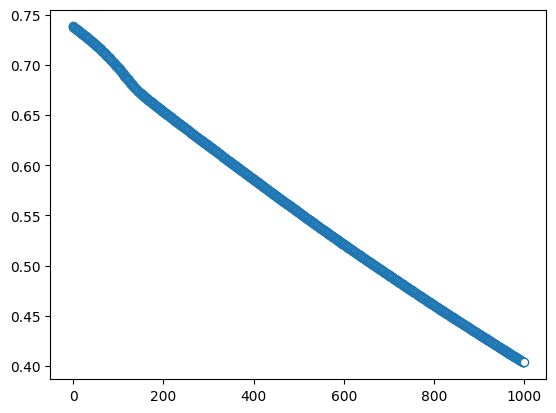

In [17]:
model, lossfunc, optimizer = createANNModel(learningRate)
losses, predictions, accuracy = trainTheModel(model)

print("Final accuracy: %g%%" %accuracy)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.show()

In [34]:
learningRates = np.linspace(0.001, 0.1, 40)
accByLR = []
allLosses = np.zeros((len(learningRates), numEpochs))

for i, lr in enumerate(learningRates):
    model, losfunc, optimizer = createANNModel(lr)
    losses, predictions, accr = trainTheModel(model)

    accByLR.append(accr)
    allLosses[i, :] = losses.detach()

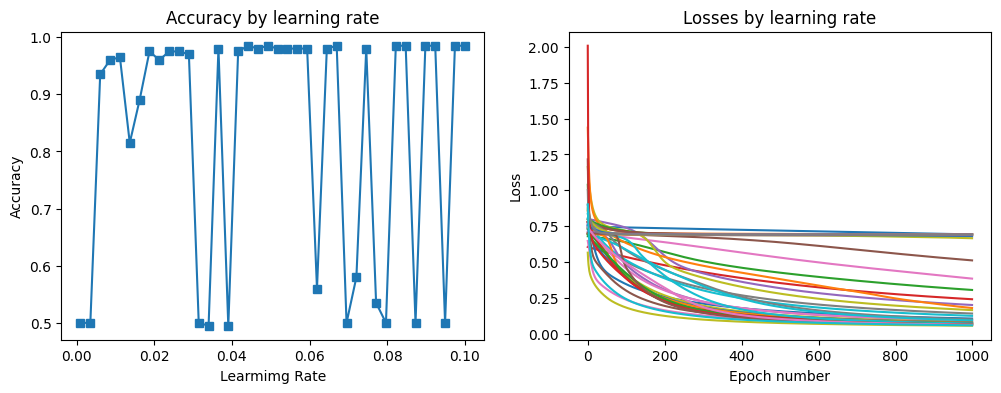

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(learningRates, accByLR, 's-')
ax[0].set_title("Accuracy by learning rate")
ax[0].set_xlabel("Learmimg Rate")
ax[0].set_ylabel("Accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [36]:
sum(torch.tensor(accByLR) > 70)/len(accByLR)

tensor(0.)

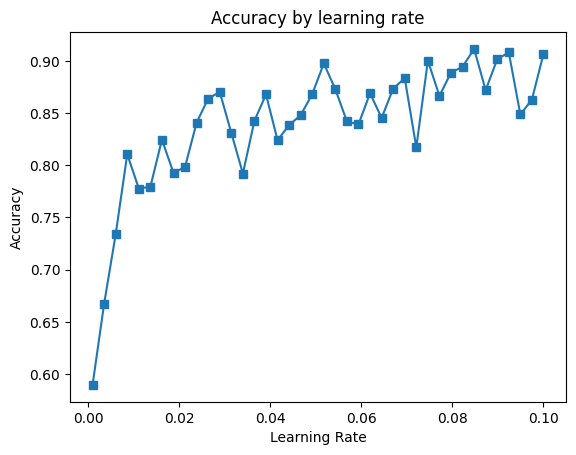

In [57]:
numExps = 50

accMeta = np.zeros((numExps, len(learningRates)))

for x in range(numExps):
    for i, lr in enumerate(learningRates):
        model, losfunc, optimizer = createANNModel(lr)
        losses, predictions, accr = trainTheModel(model)

        accMeta[x, i] = accr

plt.plot(learningRates, np.mean(accMeta, axis=0), 's-')
plt.xlabel("Learning Rate")
plt.ylabel('Accuracy')
plt.title("Accuracy by learning rate")
plt.show()

0.018899999856948853
